## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

## Básico

Criando símbolos

In [2]:
x = smp.symbols('x')
x

x

Atribuindo a variáveis

In [3]:
y = smp.cos(x)
y

cos(x)

Operações com símbolos

In [4]:
z = y - x**2
z**2

(-x**2 + cos(x))**2

Métodos com expressões

In [5]:
w = (x**2 + 4*x + 3)**2
w

(x**2 + 4*x + 3)**2

In [6]:
w.factor()

(x + 1)**2*(x + 3)**2

In [7]:
w.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

Achando valor da abcissa quando a cordenada das ordenadas vale 0 [f(x) = 0]

In [8]:
smp.solve(w, x)

[-3, -1]

In [9]:
smp.solve(smp.sin(x), x)

[0, pi]

**Boa prática:** se a variável simbólica for real, defini-la como Real (além de outros atributos)

In [10]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [11]:
x = smp.symbols('x', real=True)
smp.solve(x**2+1, x)

[]

In [12]:
x = smp.symbols('x', real=True, positive=True) #integer, ...
smp.solve(x+4, x)

[]

Definindo mais de uma variável ao mesmo tempo

In [13]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Descobrindo soluções para variáveis específicas

In [14]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [15]:
y_sols = smp.solve(F, y)
y_sols

[-x**2/sin(z)]

In [16]:
z_sols = smp.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Criando uma função

In [21]:
symbolic_func = smp.asin(x**2/y) + smp.pi
expr = smp.lambdify((x, y), symbolic_func)
expr(1, 2)

3.6651914291880923

É possível instanciar esta função com um array, retornando um array de valores

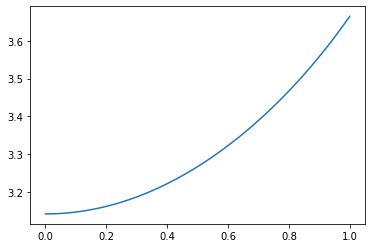

In [19]:
x_num = np.linspace(0, 1, 100)
y_num = 2
plt.plot(x_num, expr(x_num, y_num))
plt.show()

Também é possível substituir valores fixos

In [20]:
F = x**2 + y*smp.sin(z)
F

x**2 + y*sin(z)

In [21]:
F.subs([(y,3),(z,smp.pi/2)])

x**2 + 3

In [22]:
F.subs([(y,smp.cos(z)),(z,smp.pi/2)])

x**2

Substituição é feita a partir da lista: primeira substituição é o primeiro index, depois o segundo, ...

In [23]:
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

## *Exemplo 1* 
Um objeto caindo encontra uma plataforma que está subindo:
1. Objeto: $h_o(t)=h_o-v_ot-\dfrac{1}{2}\cdot gt^2$
2. Plataforma: $h_p(t)=v_pt+\dfrac{1}{2}\cdot qt^2$

**Encontre a velocidade inicial $v_o$ do objeto para que eles estejam se movendo com a mesma velocidade no instante do impacto**

### Resolução

Equações válidas para o problema proposto:
1. $h_o(t) = h_p(t)$

2. $\dfrac{dh_o}{dt}(t) = -\dfrac{dh_p}{dt}(t)$

Para o sympy, devemos igualar as equações à 0 e, portanto:

1. $h_o(t) - h_p(t) = 0$

2. $\dfrac{dh_o}{dt}(t) + \dfrac{dh_p}{dt}(t) = 0$

Definindo variáveis simbólicas

In [24]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Definindo expressões 

**Boa prática:** quando se tem divisões racionais, vale a pena usar o ```smp.Rational(1,2)```

In [25]:
# Objeto
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0

# Plataforma
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

Definindo equações


In [26]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt
eq1

-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p

In [27]:
eq2

g*t + q*t - v_0 + v_p

Encontrando as respostas

In [28]:
t_colisao, v_inicial_queda = smp.solve([eq1, eq2], [t, v0])[0] #Dois valores possíveis

In [29]:
t_colisao

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

In [30]:
v_inicial_queda

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

Encontrando a velocidade de colisão

In [31]:
dh0dt.subs([(t, t_colisao),(v0, v_inicial_queda)]).simplify()

-(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

Para verificar

In [32]:
-1*dhpdt.subs([(t, t_colisao),(v0, v_inicial_queda)]).simplify()

-(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

## Cálculo 1 e 2

In [33]:
x = smp.symbols('x')

Limite

$$\lim_{x\to\pi} sin \left( \dfrac{x}{2}+sin(x)\right)$$

In [34]:
smp.limit(smp.sin(x)/x,x,0)

1

Derivada

$$\dfrac {d}{dx} \left(\dfrac{1+sin(x)}{1-cos(x)}\right)^2$$

In [35]:
smp.diff(((1+smp.sin(x))/(1-smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

Derivada de funções abstratas

In [90]:
f, g = smp.symbols('f g', cls=smp.Function) # Definindo funções

g = g(x)
g

g(x)

In [37]:
f = f(x+g)
f


f(x + g(x))

In [38]:
dfdx = smp.diff(f, x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [39]:
dfdx.subs([(g, smp.sin(x))]) #não recalcula a derivada de sin(x)...

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [40]:
dfdx.subs([(g, smp.sin(x))]).doit() 


(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

Integrais básicas indefinidas

*Exemplos linguagem Latex*

* $\int_x csc(x)\cdot cot(x) dx$

* $\int_x csc(x)\cdot cot(x) \mathrm{d}x$

* $\int_x csc(x)\cdot cot(x) \: \mathrm{d}x$

In [41]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

Integrais definidas

$$\int_{0}^{ln(4)}\dfrac{e^x\:dt}{\sqrt{e^{2x}+9}}$$


In [42]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_{1}^{t}x^{10}\cdot e^x \: dx$$

In [43]:
t = smp.symbols('t')
expr_t_not_func = smp.integrate(x**10*smp.exp(x), (x, 1, t))
expr_t_not_func


(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

In [44]:
expr_t = smp.lambdify(t, expr_t_not_func)
expr_t(2)

1177.0273835514672

`--help` para funções em um notebook

In [45]:
# smp.symbols?

*Obs:* duas formas de definir expressões que possuem variáveis dentro (função / expressão) 

In [46]:
g = 9.81
v0 = 10
s0 = v0

s_expr = s0 + v0*t - g*t**2/2
s_func = smp.lambdify(t, s_expr)

In [47]:
float(s_expr.subs([(t,1)])) == s_func(1)

True

Infinito no sympy

In [51]:
smp.oo

oo

## Cálculo - Multivariáveis

In [52]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

Matrizes

In [53]:
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

In [54]:
u

Matrix([
[u_1],
[u_2],
[u_3]])

In [55]:
v

Matrix([
[v_1],
[v_2],
[v_3]])

In [56]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [57]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [58]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [59]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$$proj_v(u) = \frac{u\cdot v}{|v|^2}\cdot v$$

In [60]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Definindo retas

$$\vec r(t)=\vec {r_0} +t\cdot \vec v$$

In [61]:
r0 = smp.Matrix([1,1,1]) # Posso pensar como sendo um ponto
v = smp.Matrix([1,3,-1])
r = r0 + v*t
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Plano

$$\vec n = \begin{bmatrix}
a \\
b \\
c
\end{bmatrix}$$

$$P_0 = (d, e, f)$$
<br>

$$\pi :\{ax + by + cz - (ad + be + cf) = 0$$
$$\mathrm{OU}$$
$$\pi = \begin{cases} 
x = d + a\lambda \\
y = e + b\lambda \\
c = f + c\lambda
\end{cases}, \lambda \in \mathbb{R}
$$
$$\mathrm{OU}$$
$$\pi :\{\vec n\cdot (P_0 - <x,y,z>) = 0$$

Primeiro exemplo

In [68]:
a, b, c, d, e, f, lmb = smp.symbols('a b c d e f \lambda', real=True)
n = smp.Matrix([a,b,c])
P_0 = smp.Matrix([d,e,f])

pi_expr = a*x + b*y + c*z - (a*d + b*e + c*f)
pi_expr

-a*d + a*x - b*e + b*y - c*f + c*z

Segundo exemplo

In [73]:
pi_matrix = P_0 + n*lmb
pi_matrix

Matrix([
[\lambda*a + d],
[\lambda*b + e],
[\lambda*c + f]])

Terceiro exemplo

In [74]:
r = smp.Matrix([x,y,z])
pi_expr_2 = n.dot(P_0 - r)
pi_expr_2

a*(d - x) + b*(e - y) + c*(f - z)

## Cálculo Vetorial

Integral de vetores

In [75]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [77]:
smp.Integral(r, t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

Integração Numérica


In [78]:
from scipy.integrate import quad_vec

r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [79]:
r_f = smp.lambdify([t], r)
r_f

<function _lambdifygenerated(t)>

In [80]:
quad_vec(r_f, 0, 1) # Demonstrando o valor numérico, junto com o erro (integrando de 0 a 1)

(array([[0.81549671],
        [0.84483859],
        [0.30229989]]),
 4.039233845603321e-14)

## Derivadas Parciais e Regra da Cadeia

In [81]:
x, y, z = smp.symbols('x y z')

Tendo: $f(x,y) = y^2\cdot sin(x+y)$, quero encontrar:

$$\frac{\delta f}{\delta x}(x,y) = ?$$
$$\frac{\delta f}{\delta y}(x,y) = ?$$

In [102]:
f = y**2 + smp.sin (x+y)
f

y**2 + sin(x + y)

In [95]:
smp.diff(f, y)

2*y + cos(x + y)

In [96]:
smp.diff(f, x)

cos(x + y)

In [100]:

f_func = smp.symbols('f', cls=smp.Function) # Definindo funções

f_func = f_func(x,y)

dfdx = smp.diff(f_func, x)
dfdy = smp.diff(f_func, y)
dfdx


Derivative(f(x, y), x)

In [104]:
dfdx.subs([(f_func, f)]).doit() 


cos(x + y)

In [105]:
dfdy.subs([(f_func, f)]).doit() 


2*y + cos(x + y)

$$\frac{\delta ^3 f}{\delta xy^2}(x,y)$$

In [108]:
smp.diff(f,y,y,x)

-cos(x + y)

Regra da Cadeia

In [109]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

Suponha que:
* $x$, $y$ e $z$ são funções de $t$: $x(t)$, $y(t)$, $z(t)$
* $w$ é uma função de $x$, $y$ e $z$: $w(x,y,z)$

$$\frac{\delta w}{\delta t}(t) = ?$$

In [110]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [111]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Exemplificando

In [112]:
w_num = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w_num,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

Derivação Implícita

In [115]:
x, y, z = smp.symbols('x y z')
ex1 = x**5 + y**2 + z**4 - 8*x*y*z
ex1_d = smp.simplify(smp.idiff(ex1,x,z))
display(ex1_d)

ex2 = x**2 + y**2 - 4
ex2_d = smp.idiff(ex2, x, y).simplify()
display(ex2_d)

4*(2*x*y - z**3)/(5*x**4 - 8*y*z)

-y/x

## Múltiplas Integrais (Integral Dupla, Tripla, ...)

$$\int_0^1\int_0^{1-x^2}\int_3^{4-x^2-y^2}x\:dzdydx$$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

## Números Complexos

In [28]:
x, y = smp.symbols('x y', real=True)
display(x + smp.I)

display(smp.re(x+smp.I*y))

display(smp.im(x+smp.I*y))

display(smp.solve(x**2 + 1, x))

x + I

re(x) - im(y)

re(y) + im(x)

[-I, I]

Módulo de um número complexo

In [30]:
display(smp.Abs(4+3*smp.I))

5